<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [29]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [30]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Tratamento de variáveis categóricas </h2>

Muitas vezes, dados adquiridos não são necessariamente expressos em termos de números.

Uma outra forma comum de se caracterizar um conjunto de dados é através da utilização de **rótulos** que dividem os atributos em **categorias**.

Como exemplo, podemos ter os seguintes atributos:

| <font color='blue'>Atributo</font> | <font color='blue'>Possíveis Rótulos</font> |
| -------- | ----------------- |
| **tipo_pessoa** | 'F' ou 'J' |
| **dia_acesso** | 'Dom', 'Seg', 'Ter', etc... |
| **idade** | '[0,18)', '[18,22)', '[22,35)', '[35,$\infty$)' |

Com estes dados em mãos, deve-se escolher boas maneiras de transformar estes rótulos para uma estrutura que seu preditor seja capaz de compreender. 

<br/>
<h3>Qual será a maneira mais adequada para a manipulação de dados deste tipo?</h3>

A resposta depende de algumas avaliações:

- Existe uma **noção de ordem** para os atributos em questão?
    - Para o exemplo de **dia_acesso**, existe uma relação clara de ordem
        - 'Dom' ocorre após 'Sab', que ocorre após 'Sex', ... <br/><br/>
    - Para o exemplo de **tipo_pessoa**, essa relação não está presente
        - 'F' > 'J' ou 'J' > 'F' não faz sentido
        - Possivelmente, não faria sentido associar ‘F’ à 1 e ‘J’ à 2 ou vice-versa <br/><br/>
    - Para o exemplo de **idade**, existe uma relação clara de ordem
        - '(0, 18]' < '(18, 22]' < '(22,35]' < '(35, 91]' <br/><br/>
- Existe uma **noção de grau** para os atributos em questão?
- O alvo que você deseja prever exige uma noção de grau ?
    - Exemplo: prever qual o dia da semana uma empresa de energéticos deve oferecer um produto a um determinado cliente. Aqui faz sentido que 'Seg' = 1 e 'Sex' = 5, quanto maior o 'dia_acesso', maior a chance de venda do produto. Existe uma noção de grau. <br/><br/>
- O preditor a ser utilizado consegue trabalhar com variáveis categóricas?
    - Máquinas de Vetores Suporte (SVM), Redes Neural, Regressor Logístico e Linear necessitam de entradas numéricas
    - Árvores de Decisão e Naive Bayes conseguem lidar com atributos categóricos
        - <font color = "red"> **Isto não quer dizer que as implementações aceitem entrada do tipo string!**</font>

Salvo considerações específicas de projeto, podemos fazer uma escolha: Variáveis  sem noção de ordem e grau são convertidas usando índices **_dummy_**

![](img/dummy.png)

**Possíveis problemas**
- Uma coluna é redundante: fácil de perceber em <i>tipo_pessoa</i>
- Número de colunas aumenta conforme número de classes: <i>dia_acesso</i> se transforma em 7 colunas
- Possível solução: G Code

**Dificuldades específicas de estimação**
- Algoritmos de clusterização: noção de proximidade é deteriorada
    - Possível solução: K-Prototypes
- Algoritmos muito complexos: maior chance de **overfitting** para muitas colunas

Salvo considerações específicas de projeto, podemos fazer uma escolha: Variáveis com noção de ordem/grau são convertidas para **números inteiros**

![](img/cat_num.png)

<h2 style="text-align:center; margin:40px"> Prática </h2>

<h4> Funções de interesse </h4>

```python
    # Conseguimos ver o nome das colunas de um DataFrame Pandas
    df.columns
    
    # Podemos usar o numpy.unique para ver os valores distintos de cada coluna
    numpy.unique(df.loc[:, col])
    
    # Podemos alternar entre Pandas e Numpy Array com a função as_matrix():
    df.as_matrix()
    
    # Podemos descobrir quantas colunas são categóricas:
    cat_cols = df.select_dtypes(['category'])
    
    # Podemos transformar atributos categóricos em números inteiros:
    df.apply(lambda x : x.cat.codes, axis = 0)
    
    # Podemos fazer expansão de uma ou mais colunas em dummies:
    pd.get_dummies(df)
    pd.get_dummies(df.loc[:, col])
```

In [31]:
# Leitura dos dados em tabelas csv
data = pd.read_csv('data/lenses_final.csv', index_col=0, dtype="category")

In [32]:
data.head()

,age,spec_presc,is_astig,tear_rate,which_lens
index,,,,,
1,young,myope,no,reduced,needs_no_lenses
2,young,myope,no,normal,needs_soft_lenses
3,young,myope,yes,reduced,needs_no_lenses
4,young,myope,yes,normal,needs_hard_lenses
5,young,hypermetrope,no,reduced,needs_no_lenses


<b> Os dados que temos em mãos são categóricos. Contêm informações sobre indivíduos. A variável a ser predita seria o tipo da lente a ser associada</b>

<h3 class="subtitle"> 
Identificação das categorias por coluna:
</h3>

In [33]:
# abordagem via pandas
print("A primeira abordagem utiliza a biblioteca pandas\n")
for e in data.columns:
    print("Categorias da coluna '{}' sao \n{}\n".format(e, list(data[e].cat.categories)))

A primeira abordagem utiliza a biblioteca pandas

Categorias da coluna 'age' sao 
['pre-presbyopic', 'presbyopic', 'young']

Categorias da coluna 'spec_presc' sao 
['hypermetrope', 'myope']

Categorias da coluna 'is_astig' sao 
['no', 'yes']

Categorias da coluna 'tear_rate' sao 
['normal', 'reduced']

Categorias da coluna 'which_lens' sao 
['needs_hard_lenses', 'needs_no_lenses', 'needs_soft_lenses']



In [34]:
print("A segunda abordagem utiliza a biblioteca numpy\n")
# o método as_matrix() transforma uma tabela do Pandas em um numpy
data_np = data.as_matrix()
nsamp, ncols = data.shape
# o método unique do numpy retorna os elementos únicos de um dado array
for e in range(ncols):
    print("Categorias da coluna '{}' sao \n{}\n".format(e, list(np.unique(data.as_matrix()[:, e]))))

A segunda abordagem utiliza a biblioteca numpy

Categorias da coluna '0' sao 
['pre-presbyopic', 'presbyopic', 'young']

Categorias da coluna '1' sao 
['hypermetrope', 'myope']

Categorias da coluna '2' sao 
['no', 'yes']

Categorias da coluna '3' sao 
['normal', 'reduced']

Categorias da coluna '4' sao 
['needs_hard_lenses', 'needs_no_lenses', 'needs_soft_lenses']



C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<h3 class="subtitle">  Codificação com valores inteiros </h3>

In [35]:
cat_cols = data.select_dtypes(['category'])

In [36]:
print("\nUm objeto do tipo pandas Series tem um metodo cat.codes \nque o transforma em números inteiros")
print("\n")
print("Vejamos parte da primeira coluna da tabela original")
print("---------------------------------------------------")
print(data.iloc[:10, 0])
print("\n")
print("Vejamos as categorias únicas desta linha, mais uma vez")
print("------------------------------------------------------")
print(list(data.iloc[:, 0].cat.categories))
print("\n")
print("Vejamos os dados transformados")
print(data.iloc[:10, 0].cat.codes)


Um objeto do tipo pandas Series tem um metodo cat.codes 
que o transforma em números inteiros


Vejamos parte da primeira coluna da tabela original
---------------------------------------------------
index
1              young
2              young
3              young
4              young
5              young
6              young
7              young
8              young
9     pre-presbyopic
10    pre-presbyopic
Name: age, dtype: category
Categories (3, object): [pre-presbyopic, presbyopic, young]


Vejamos as categorias únicas desta linha, mais uma vez
------------------------------------------------------
['pre-presbyopic', 'presbyopic', 'young']


Vejamos os dados transformados
index
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     0
10    0
dtype: int8


In [37]:
# Vamos aplicar a metodologia anterior para todo o conjunto de dados
print("O metodo apply de um DataFrame pandas aplica uma mesma transformacao para todas as colunas")
print("\n")
print("Desta forma, basta dizer \n'aplique a transformacao x.cat.codes para toda coluna x'")
data_4 = data.apply(lambda x : x.cat.codes, axis=0)
print("Aqui esta o dataset transformado\n")
print(data_4.head(10))

O metodo apply de um DataFrame pandas aplica uma mesma transformacao para todas as colunas


Desta forma, basta dizer 
'aplique a transformacao x.cat.codes para toda coluna x'
Aqui esta o dataset transformado

       age  spec_presc  is_astig  tear_rate  which_lens
index                                                  
1        2           1         0          1           1
2        2           1         0          0           2
3        2           1         1          1           1
4        2           1         1          0           0
5        2           0         0          1           1
6        2           0         0          0           2
7        2           0         1          1           1
8        2           0         1          0           0
9        0           1         0          1           1
10       0           1         0          0           2


<h3 class="subtitle">  Codificação com índices bobos </h3>

In [38]:
# O pandas também é muito bom para a extensao de atributos categóricos em
# indices bobos (dummy indices)
print("Observe como a funcao get_dummies() atua com pandas Series")
print("----------------------------------------------------------")
print(pd.get_dummies(data.age).head(10))

Observe como a funcao get_dummies() atua com pandas Series
----------------------------------------------------------
       pre-presbyopic  presbyopic  young
index                                   
1                   0           0      1
2                   0           0      1
3                   0           0      1
4                   0           0      1
5                   0           0      1
6                   0           0      1
7                   0           0      1
8                   0           0      1
9                   1           0      0
10                  1           0      0


In [39]:
# Também podemos aplicar a funcao get_dummies() para um DataFrame
print("Utilizar a funcao pd.get_dummies() em uma tabela com multiplas colunas")
print("cria novas colunas com a seguinte estrutura:\n")
print("<nome da coluna original>_<categorias associadas à coluna>")
print("\n")
pd.get_dummies(data).head(5)

Utilizar a funcao pd.get_dummies() em uma tabela com multiplas colunas
cria novas colunas com a seguinte estrutura:

<nome da coluna original>_<categorias associadas à coluna>




,age_pre-presbyopic,age_presbyopic,age_young,spec_presc_hypermetrope,spec_presc_myope,is_astig_no,is_astig_yes,tear_rate_normal,tear_rate_reduced,which_lens_needs_hard_lenses,which_lens_needs_no_lenses,which_lens_needs_soft_lenses
index,,,,,,,,,,,,
1,0,0,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,1,1,0,1,0,0,0,1
3,0,0,1,0,1,0,1,0,1,0,1,0
4,0,0,1,0,1,0,1,1,0,1,0,0
5,0,0,1,1,0,1,0,0,1,0,1,0


<h3 class="question"> Exercício </h3>
<ol>
  <li class="item">Leia a tabela cars.scv</li>
  <li class="item">Descubra o nome de cada atributo </li>
  <li class="item">Descubra as possíveis categorias por atributo</li>
  <li class="item">Transforme as categorias em números inteiros</li>
  <li class="item">Transforme as categorias em índices bobos</li>
</ol>

<h2 style="text-align:center; margin:40px"> Redução de Dimensionalidade </h2>
<h2 style="text-align:center; margin:40px"> Principal Component Analysis (PCA) </h2>

![](img/PCAAnimation.gif)

![](img/pca1.png)
<br/><br/><br/><br/>
![](img/pca2.png)
<br/><br/><br/><br/>
![](img/pca3.png)

<h1 class="subtitle"><a style="color:black; text-align:center;background:white;font-size:16pt" href = "https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais">Wikipedia</a></h1>

<p class="text"> A Análise de Componentes Principais (ACP) ou Principal Component Analysis (PCA) é um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais. O número de componentes principais é menor ou igual ao número de variáveis originais. <br><br>Esta transformação é definida de forma que o primeiro componente principal tem a maior variância possível (ou seja, é responsável pelo máximo de variabilidade nos dados), e cada componente seguinte, por sua vez, tem a máxima variância sob a restrição de ser ortogonal a (i.e., não correlacionado com) os componentes anteriores. <br><br>Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente). O PCA é sensível à escala relativa das variáveis originais. Dependendo da área de aplicação, o PCA é também conhecido como transformada de Karhunen-Loève (KLT) discreta, transformada de Hotelling ou decomposição ortogonal própria (POD).</p>

<p style="color:red; text-align:center;background:yellow;font-size:32pt"> <br>Atenção <br><br></p>
<p style="color:black; text-align:center;background:white;font-size:16pt"> PCA não faz seleção de atributos! <br> Você precisa guardar todas as colunas e componentes </p>

<h2 style="text-align:center; margin:40px"> Kernel Principal Component Analysis (K-PCA) </h2>
![](img/kpca.png)

<h2 style="text-align:center; margin:40px"> Prática </h2>

<h4> Funções de interesse </h4>

```python
    # Utilizando o PCA para transformar dados para 2D
    from sklearn import decomposition
    pca = decomposition.PCA(n_components = 2)
    df_2d = pca.fit_transform(df)
    
    # Utilizando K-PCA para transformar dados para 2D
    kpca = decomposition.KernelPCA(n_components = 2, kernel = 'rbf', gamma = 10)
    df_2d = kpca.fit_transform(df)
    
    # Usamos seaborn para plot 2D e matplotlib para plot 3D
    fig = plt.figure(1, figsize = (4, 3))
    plt.clf()
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)
    ax.scatter(x, y, z)
```

In [40]:
data = pd.read_csv('data/iris.csv')
X = data.loc[:, data.columns != 'species']
y = data.species

In [41]:
X.shape

(150, 4)

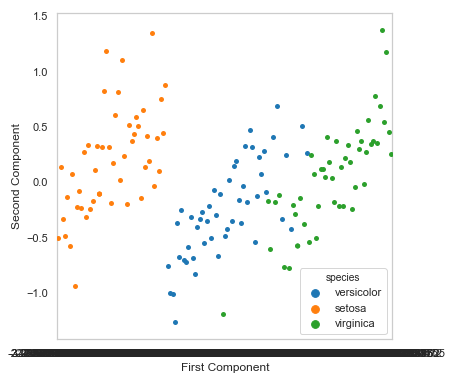

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

fig = plt.figure(1, figsize=(6, 6))
plt.clf()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca2 = pca.transform(X)
df = pd.DataFrame(data = X_pca2, columns=['First Component', 'Second Component'])
sns.stripplot(x="First Component", y="Second Component", data=df, hue=y)

In [43]:
y = y.astype('category').cat.codes

In [44]:
X.shape

(150, 4)

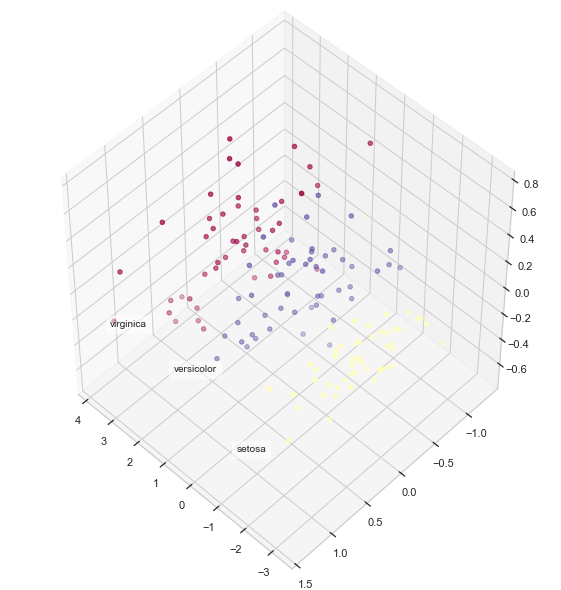

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline
# Se nao plotar, tente variar figsize
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('setosa', 0), ('versicolor', 1), ('virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(np.asarray(y, dtype='int32'), [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

### Kernel PCA

Text(0, 0.5, '$x_2$')

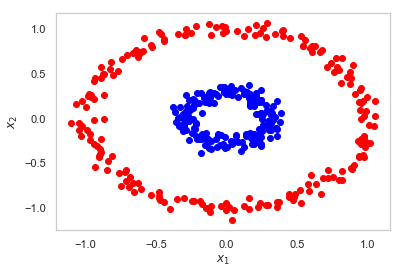

In [46]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

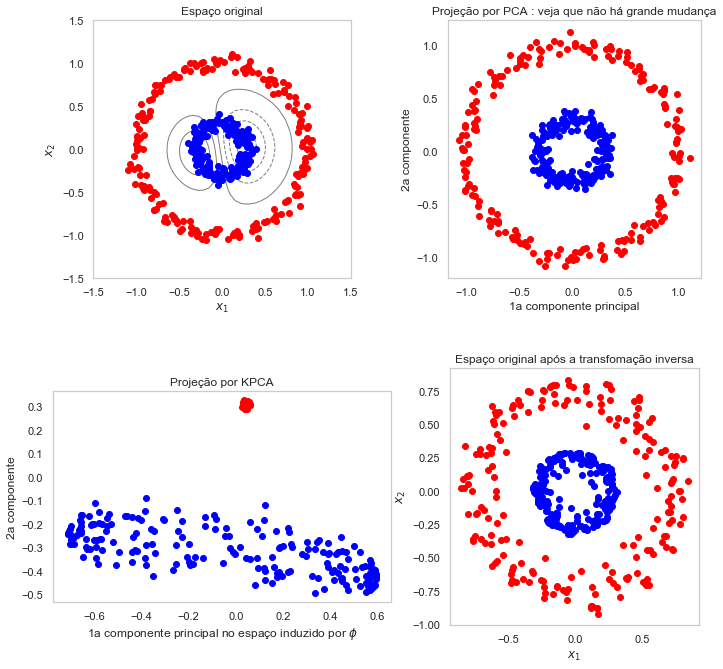

In [47]:
# Retirado de
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

# Este trecho abaixo é o que importa para vocês ---------------------------------------------------------------
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)
#--------------------------------------------------------------------------------------------------------------

# Plot results

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espaço original")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projeção por PCA : veja que não há grande mudança")
plt.xlabel("1a componente principal")
plt.ylabel("2a componente")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projeção por KPCA")
plt.xlabel("1a componente principal no espaço induzido por $\phi$")
plt.ylabel("2a componente")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Espaço original após a transfomação inversa")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

<h2 style="text-align:center;margin:40px">Filtragem de variáveis</h2>

![](img/filtering.gif)

<h3 style="text-align:center;">Ideia : Medir o grau de dependência da variável alvo em relação aos atributos</h3>

<h3 style="text-align:center;margin:40px">1 - Escolha uma métrica que mede a influência de atributos X na resposta Y</h3>
<h4 style="text-align:center;">Informação Mútua</h4>
$$I(X;Y) = \sum_{y \in Y}\sum_{x \in X}p(x,y)\log{\frac{p(x,y)}{p(x)p(y)}}$$
$$H(Class) + H(Attribute) - H(Class,Attribute)$$
<h4 style="text-align:center;">Covariância (obs: não é uma comparação justa)</h4>
$$cov(x,y) = \frac{1}{N}\sum_{i=1}^{N}{(x_i-\bar{x})(y_i-\bar{y})}$$
<h4 style="text-align:center;">Correlação de Pearson</h4>
$$p_{x,y} = \frac{cov(x,y)}{\sigma_x \sigma_y}$$
<h3 style="text-align:center;margin:40px">2 - Selecionar dentre os atributos os K mais relevantes, ou um percentil $0\lt q\lt 1$ do total de atributos de maior relevância</h3>

<h2 style="text-align:center;margin:40px">Prática</h2>

```python
    # Um objeto do tipo pandas Series (que é basicamente uma coluna) pode ser transformado pela função map
    coluna.map(function_name)
    
    # Podemos importar duas funções para calculo de similaridades:
    from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, f_regression
    
    # Estas são utilizadas da seguinte forma:
    <valor da informação mutua (formula de regressao)> = mutual_info_regression(X, y)
    <valor da informação mutua (formula de classificação)> = mutual_info_classif(X, y)
    <valor da f_regressao> = f_regression(y)
    
    # Podemos automatizar a escolha de atributos utilizando:
    from sklearn.feature_selection import SelectKBest, SelectPercentile
    selectorK = SelectKBest(score_func = <funcao que calcula similaridade>, k = <numero de atributos>)
    selectorK.fit(X, y)
    selectorPercentile = SelectPercentile(score_func = <funcao que calcula similaridade>, percentile = <% de atributos>)
    selectorPercentile.fit(X, y)
    X_reduzido_K_melhores = selectorK.transform(X)
    X_reduzido_percentil = selectorPercentile.transform(X)
```

In [48]:
data_cars = pd.read_csv('data/cars.csv', dtype='category')
y = data_cars.accept
X = data_cars.loc[:,'buying':'safety']

In [49]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: accept, dtype: category
Categories (4, object): [acc, good, unacc, vgood]

In [50]:
# Os valores y vamos mapear para float, para o cálculo de informação
# No sentido de termos uma tarefa de regressao:
def target_to_float(x):
    if x == 'unacc':
        return 0.0
    elif x == 'acc':
        return 1.0
    elif x == 'good':
        return 2.0
    elif x == 'vgood':
        return 3.0
y = y.map(target_to_float)
X = pd.get_dummies(X)

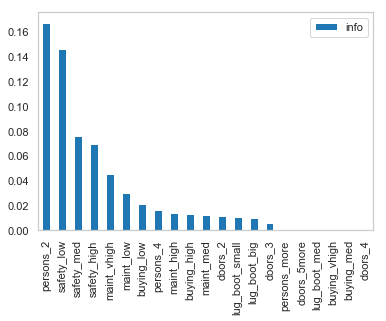

In [51]:
# Maneira manual para seleção de variáveis: LOOP
from sklearn.feature_selection import mutual_info_regression
info_reg = {}
for var in X.columns:
    info_reg[var] = mutual_info_regression(X[[var]].astype(float), y)[0]
info_reg = pd.DataFrame(data=list(info_reg.values()), index=info_reg.keys(), columns=['info'])
info_reg = info_reg.sort_values(by='info', ascending=False)
#info['index'] = np.arange(info.shape[0])
info_reg.plot(kind='bar')

```python
# Variáveis mais importantes
print(list(info_reg.index)[:3])
```

In [52]:
print(list(info_reg.index)[:3])

['persons_2', 'safety_low', 'safety_med']


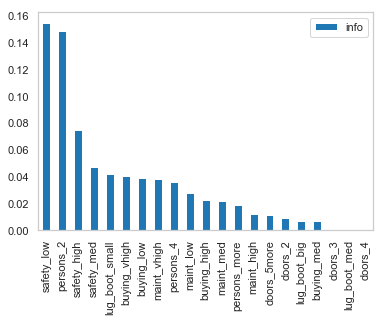

In [53]:
# Maneira manual para seleção de variáveis: LOOP
from sklearn.feature_selection import mutual_info_classif
info_clf = {}
for var in X.columns:
    info_clf[var] = mutual_info_classif(X[[var]].astype(float), y)[0]
info_clf = pd.DataFrame(data=list(info_clf.values()), index=info_clf.keys(), columns=['info'])
info_clf = info_clf.sort_values(by='info', ascending=False)
#info['index'] = np.arange(info.shape[0])
info_clf.plot(kind='bar')

```python
# Variáveis mais importantes
print(list(info_clf.index)[:3])
```

In [54]:
print(list(info_clf.index)[:3])

['safety_low', 'persons_2', 'safety_high']


<h3>Maneira rápida via sklearn! </h3>

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression
selectorK = SelectKBest(score_func=f_regression, k=5)
selectorK.fit(X, y)
print("Para k = 5, o metodo do sklearn transformou os dados para:")
X_clf = pd.DataFrame(selectorK.transform(X))
print(X_clf.head(10))
# Se quiser ver os scores do sklearn, eles estao aqui:
scores_clf = dict((X.columns[e], selectorK.scores_[e]) for e in range(X.shape[1]))
scores_clf = pd.DataFrame(data=list(scores_clf.values()), index=list(scores_clf.keys()), columns=['info'])

Para k = 5, o metodo do sklearn transformou os dados para:
   0  1  2  3  4
0  0  1  0  0  1
1  0  1  0  0  0
2  0  1  0  1  0
3  0  1  0  0  1
4  0  1  0  0  0
5  0  1  0  1  0
6  0  1  0  0  1
7  0  1  0  0  0
8  0  1  0  1  0
9  0  0  1  0  1


In [56]:
scores_clf.sort_values(by='info', ascending=False)

,info
safety_low,321.439131
persons_2,321.439131
safety_high,264.833026
buying_low,83.101393
persons_4,72.367076
persons_more,68.682088
maint_vhigh,67.189104
buying_vhigh,67.189104
lug_boot_small,41.108421
maint_low,39.377835


<h3 class="question">Exercício</h3>
<ol>
  <li class="item">Leia os dados do "boston" sklearn</li>
  <li class="item">Identifique os 30% atributos com maior grau de mutual info com a variável alvo</li>
</ol>

<h3 class="comment">Dicas</h3>

<ol>
  <li class="item">Copie a célula que carrega o IRIS</li>
  <li class="item">Faça columns = list(boston.feature_names)</li>
</ol>
